# Megan Stanwood

### I am interested in the frequency of guardianships and conservatorships in the United States. I am also curious about the progression of guardianships/conservatorships, and how ethics play a role. I am specifically interested in the different court rulings in different states, and through my data analysis, I would like to explore how the states differ in frequency of conservatorships and guardianships. Why it is so prevalent in the United States today? Why do some states differ so greatly in their numbers?

In [21]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('filing_counts.csv')

DeleteList=['case_action',"for_total","age_group"]
df=df.drop(DeleteList, axis=1)


df.head()

,state,year,case_type,count
0,Alaska,2020,G+C+Joint,1171
1,Alaska,2019,G+C+Joint,1084
2,Alaska,2018,G+C+Joint,1227
3,Alaska,2017,G+C+Joint,1090
4,Arizona,2020,Guardianship ONLY,2520


In [2]:
df['year'].mean()

2018.4184210526316

In [3]:
df.shape

(380, 4)

In [4]:
df.nunique(axis=0)
#there are 6 different years that case filings are pulled from
#there are 4 different case types: G+C+J, G only, C only, and Joint only

state         37
year           6
case_type      4
count        332
dtype: int64

In [5]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,count
count,380.000000,380.000000
mean,2018.418421,1817.150000
std,1.264985,3525.655222
min,2016.000000,0.000000
25%,2017.750000,144.750000
50%,2018.000000,592.500000
75%,2019.000000,2097.000000
max,2021.000000,28004.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      380 non-null    object
 1   year       380 non-null    int64 
 2   case_type  380 non-null    object
 3   count      380 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.0+ KB


In [7]:
len(df)

380

In [8]:
list(df.columns)

['state', 'year', 'case_type', 'count']

In [13]:
eda(df)

Preview of data:


,state,year,case_type,count
0,Alaska,2020,G+C+Joint,1171
1,Alaska,2019,G+C+Joint,1084
2,Alaska,2018,G+C+Joint,1227



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      380 non-null    object
 1   year       380 non-null    int64 
 2   case_type  380 non-null    object
 3   count      380 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.0+ KB
None

***Number of duplicated entries:  7


,state,year,case_type,count
160,Michigan,2018,Conservatorship ONLY,0
164,Michigan,2018,Conservatorship ONLY,0
158,Michigan,2018,Guardianship ONLY,0
162,Michigan,2018,Guardianship ONLY,0
152,Michigan,2019,Conservatorship ONLY,0


In [41]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
#Understanding my variables

## Figures for analysis

this histogram shows the frequency that each year is listed in the dataset. The histogram isolates one variable and allows it to be studied in more detail. The years are listed on the x axis, and the frequency that they are listed in the dataset is listed on the y axis


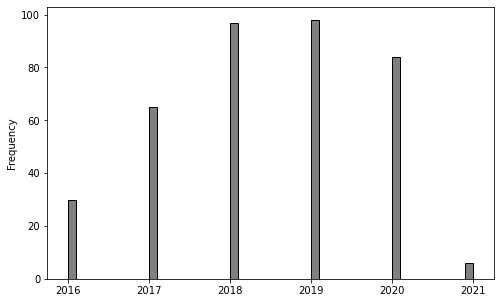

In [14]:
df['year'].plot(kind='hist', bins=50, figsize=(8,5), facecolor='grey',edgecolor='black')
print('this histogram shows the frequency that each year is listed in the dataset. The histogram isolates one variable and allows it to be studied in more detail. The years are listed on the x axis, and the frequency that they are listed in the dataset is listed on the y axis')

In [30]:
# set identifier "case_type" as string
df['case_type'] = df['case_type'].astype('str')
# set categorical data
df['case_type'] = df['case_type'].astype('category')
df['year'] = df['year'].astype('int64')
df['count'] = df['count'].astype('int64')
df['state'] = df['state'].astype('category')

sns.set_theme(style="white")


Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        Joint G/C ONLY     56
 

To check: 
Unique count of non-numeric data

state        37
case_type     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        Joint G/C ONLY     56
 


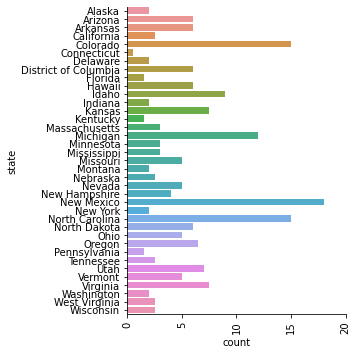

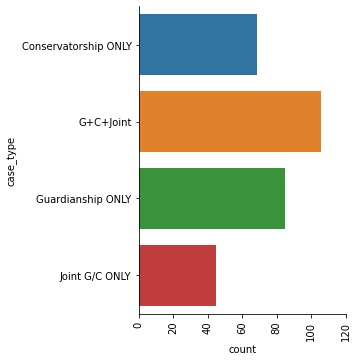

The boxplot of state by count gives me an idea of how mnay times a state is listed in the dataset. It does not have any information about actual counts of cases in each state, but it can provide information about discrepancies between states.The boxplot of case type by count demonstrates the frequency of case types listed in the dataset. Predictably, the most commonly listed case type is Guardianship+Conservatorship+Joint, which is the category that includes all types of cases. Of the 50 states, 37 states released records of court rulings.


In [16]:
top5(df)

categorical_eda(df)
print("The boxplot of state by count gives me an idea of how mnay times a state is listed in the dataset. It does not have any information about actual counts of cases in each state, but it can provide information about discrepancies between states.The boxplot of case type by count demonstrates the frequency of case types listed in the dataset. Predictably, the most commonly listed case type is Guardianship+Conservatorship+Joint, which is the category that includes all types of cases. Of the 50 states, 37 states released records of court rulings.")


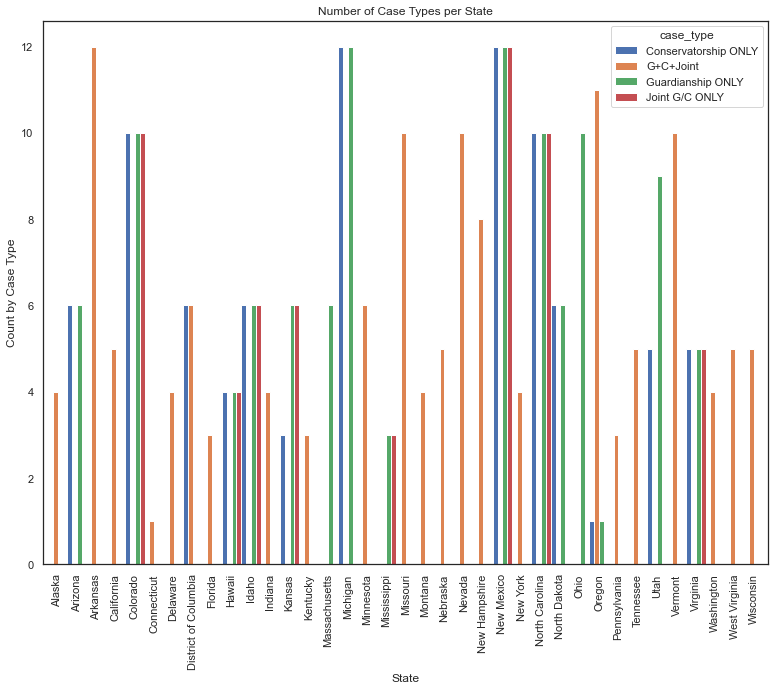

In [59]:
grouped_bar=pd.crosstab(columns=df["case_type"], index=df["state"])
grouped_bar.plot.bar(figsize=(13,10),width=1)
plt.title("Number of Case Types per State")
plt.xlabel("State")
plt.ylabel("Count by Case Type")


def change_width(ax, new_value) :
    locs = ax.get_xticks()
    for i,patch in enumerate(ax.patches):
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(locs[i//4] - (new_value * 1))

This chart allows me to see the difference between case types by state. As we can see, there is a lot of variance between states regarding the records they release. Each case type will have a different year and count. For example, New York has four counts of G+C+Joint, over four years, and an average of around 20,000 cases per year. Although this graph doesn't allow us to see the counts of cases for each state, but again, it can help us understand the differences between states, and the ratio of case types to count.

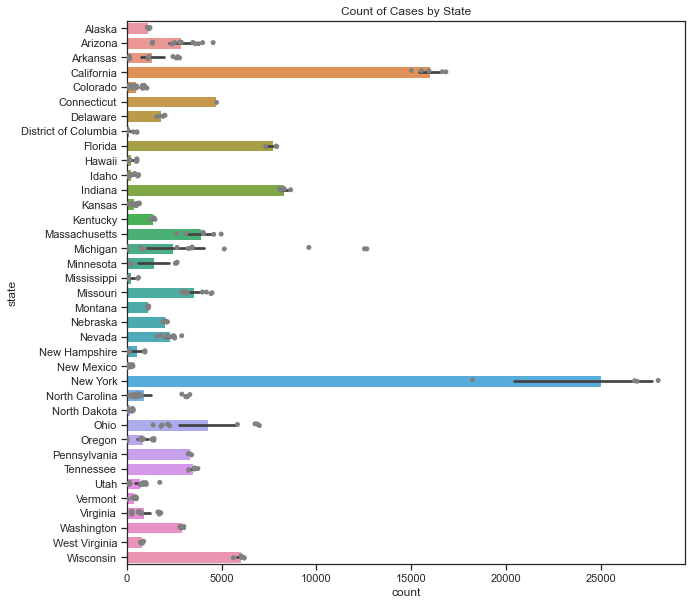

In [107]:
sns.barplot(y="state", x="count", data=df).set_title("Count of Cases by State")
sns.stripplot(y="state", x="count", data=df, color="grey")
sns.set(rc = {'figure.figsize':(10,10)})
sns.set_theme(style="white")
sns.set_style("ticks")

This bar plot with a strip plot overlay allows me to see all the counts of cases per state. Each state had a few entries with different counts that correspond to different years and case types. This graph is helpful because I can visualize the discrepancies between states and their case counts. For example, New York and California are outliers, with their high counts and minimal entries. 

In [81]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")
    

No. of duplicated entries:  7
        state  year             case_type  count
160  Michigan  2018  Conservatorship ONLY      0
164  Michigan  2018  Conservatorship ONLY      0
158  Michigan  2018     Guardianship ONLY      0
162  Michigan  2018     Guardianship ONLY      0
152  Michigan  2019  Conservatorship ONLY      0


In [82]:
df.drop_duplicates(inplace=True)

In [83]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [84]:
df = df.set_index("state")
df.head()
#setting the index as state makes it a lot easier for me to locate information specific to each state

,year,case_type,count
state,,,
Alaska,2020,G+C+Joint,1171
Alaska,2019,G+C+Joint,1084
Alaska,2018,G+C+Joint,1227
Alaska,2017,G+C+Joint,1090
Arizona,2020,Guardianship ONLY,2520


Setting the state column as the index can allow me to search through the dataset easily. I can calculate the average of each state's count of cases and narrow down the dataset to help my analysis. For example:

In [85]:
df2=df.loc["New York"]
df2.head()

,year,case_type,count
state,,,
New York,2020,G+C+Joint,18226
New York,2019,G+C+Joint,26763
New York,2018,G+C+Joint,26893
New York,2017,G+C+Joint,28004


In [87]:
df2["count"].mean()

24971.5

#### I am interested in the frequency of guardianships and conservatorships in the United States. I am also curious about the progression of guardianships/conservatorships, and how ethics play a role. I am specifically interested in the different court rulings in different states, and through my data analysis, I would like to explore how the states differ in frequency of conservatorships and guardianships. How greatly do the States with the highest and lowest average counts of cases differ?

We gathered our dataset from Buzzfeed, they had led an investigation into guardianship and conservatorship court filings in the United States. Of 50 states, only 37 were willing to release sealed documents. Many states use local courts for guardianship and conservatorship cases, which are unequipped and sometimes corrupt. As Buzzfeed states in their related news article "Beyond Britney: Abuse, Exploitation, And Death Inside America’s Guardianship Industry", many of the same lawyers, jurors, and judges preside over these cases, forming a network with powerful financial incentives. Conservatorships and guardianships are considered worst case scenario, and a last resort. A guardianship will apoint someone as the "guardian", who will fill a caretaker role and make decisions on behalf of the subject's best interest. A conservatorship will appoint someone as a "conservator", someone who is in charge of the subject's property and financial affairs. Those placed under a guardianship or conservatorship are called "wards". They are used in the case when a person is completely unable to make decisions in their best interest, or are incapacitated to the point of needing to be palced under care and control. The drastic measures of this type of court ruling leads one to believe that it would be granted in uncommon and rare situations. So why it is so prevalent in the United States today? Why do some states differ so greatly in their numbers?


During my EDA, I got rid of any columns that wouldn't be necessary for my analysis. I dropped the for total column, the case action column, and the age group column. The histogram showing the frequency that each year is listed in the dataset, we see a dramatic increase in 2018 and 2019. In checking for unique values, we can confirm that there are four types of cases and 37 states listed in the dataset. The bar graph that displays the case type by count shows that there are more records of Guardianship+Conservatorship+Joint that were released than any other kind of case type. This tells us that numerous states were willing to release information on all kinds of cases. By setting the state column as the index, it became a lot easier for me to control my analysis and maneuver around my cleaned data. For example, I could isolate and study one state, and get it's average easily.

Through my data analysis, I was able to find that New York had not only the largest count of cases, but also the largest average of cases. New York reported guardianship cases, conservatorship cases, and joint cases throughout four years, from 2017 to 2020. District of Columbia has the smallest average count of cases. District of Columbia released records on G+C+Joint, as well as records on conservatorship only. Their cases range from 2018 to 2020. If just controlling for the classification of G+C+Joint, District of Columbia still has the smallest average count of cases, as well as the smallest total amount of cases. New York has an average of 24,972 cases, while District of Coumbia has an average of 257 when controlling for G+C+Joint. District of Columbia is a compact territory with a much smaller population than New York, so perhaps it's not fair that we compare the two. Instead, we can take a look at California, which comes in second behind New York with an average of 15,982. This is interesting, because the population of California nearly doubles that of New York. Is New York more lenient in their rulings? My data visualizations did confirm for me that there is a discrepancy between states and the frequency of guardianships and conservatorships. The lack of cooperation from the thirteen missing states does cause a problem in exploring discrepancies and trends. Additionally, it's for this reason we do not know an accurate count for all 50 states. With the information collected, there is still noticeable variation between the average count of cases per state.

The investigation led by Buzzfeed, as well as the investigation into Britney Spears recent release from her conservatorship, reveals the questionable morality and severity of guardianships and conservatorships. The uprise of guardianships and conservatorships is a direct result of a failed judicial system. As stated in the Buzzfeed investigative article, those under a guardianship have many of their rights taken away under the guise that they cannot make decisions for themselves.

References:
Blake, Heidi and Baker, Katie. (2021, September 17). *Beyond Britney: Abuse, Exploitation, And Death Inside America’s Guardianship Industry.* BuzzFeed.News. https://www.buzzfeednews.com/article/heidiblake/conservatorship-investigation-free-britney-spears



## Code for EDA

In [10]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(y=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data

In [ ]:
df.to_csv("Cleandata2.csv")